<a href="https://colab.research.google.com/github/mariojar31/ML_Calculadora_Valor_inmuebles_BOG/blob/master/Analisis_Tratamiento_Entrenamiento_ModeloML(InmueblesBOG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=81bedae334da5df418f585044089cc73265701f75e37b716eb557c7a6d63837e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
!pip install imblearn

  ##Conectando con Google Drive para obtener los archivos:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importando las librerías a utilizar:

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
import numpy as np

In [ ]:
from pandas.core.groupby import groupby

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pylab as pl

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import SMOTE

##Inmuebles:

In [ ]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/inmuebles_bogota.csv')

##BD DANE

In [ ]:
datos_a = pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Identificación (Capítulo A).csv', sep = ';',encoding='latin-1')

In [ ]:
datos_a.shape

(106467, 11)

In [ ]:
datos_dane=datos_a.loc[datos_a['MPIO']==11001]

In [ ]:
datos_dane.shape

(86504, 11)

In [ ]:
# datos_b=pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Datos de la vivenda y su entorno (Capítulo B).csv', sep = ';',encoding='latin-1')
# datos_c=pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';',encoding='latin-1')
# #datos_e=pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Composición del hogar y demografía (Capítulo E).csv', sep = ';',encoding='latin-1')
# datos_h=pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Educación (Capítulo H).csv', sep = ';',encoding='latin-1')
# datos_k=pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Fuerza de trabajo (Capítulo K).csv', sep = ';',encoding='latin-1')
# datos_l=pd.read_csv('/content/drive/MyDrive/Inmersion datos /DATOS DANE/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', sep = ';',encoding='latin-1')

#Analisis Inmuebles

Analizamos los datos de la BD Inmuebles

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [ ]:
inmuebles.describe()

,Habitaciones,Baños,Área
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


Localizamos y eliminamos registros que puedan generar sezgos

In [ ]:
inmuebles.loc[inmuebles['Habitaciones']>100]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000


In [ ]:
inmuebles.loc[inmuebles['Habitaciones']>30]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
37,Apartamento,Apartamento en venta en Zona Noroccidental,32,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 290.500.000
67,Apartamento,Apartamento en venta en Zona Noroccidental,32,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 290.500.000
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000


In [ ]:
inmuebles.drop(897,0,inplace=True)

In [ ]:
inmuebles=inmuebles.loc[inmuebles['Habitaciones']<23]

In [ ]:
#Renombramos las columnas
inmuebles=inmuebles.rename(columns={'Área':'Area','Baños':'Banos'})

In [ ]:
inmuebles=inmuebles.loc[inmuebles['Area']>6]

In [ ]:
inmuebles=inmuebles.loc[inmuebles['Area']<1000]

Trabajamos con la columna Valor

In [ ]:
inmuebles[['Valor']]

,Valor
0,$ 360.000.000
1,$ 670.000.000
2,$ 1.120.000.000
3,$ 890.000.000
4,$ 970.000.000
...,...
9515,$ 290.000.000
9516,$ 670.000.000
9517,$ 900.000.000
9518,$ 335.000.000


In [ ]:
valor = inmuebles.Valor.str.split(expand=True)

In [ ]:
inmuebles['Valor']=valor[1]

In [ ]:
inmuebles['Valor']=inmuebles['Valor'].str.replace('.','',regex=True)

In [ ]:
inmuebles['ValorMillon']=inmuebles.Valor.astype(float)/1000000

Eliminamos datos con valores muy lejanos al promedio que podrían sesgar el estudio

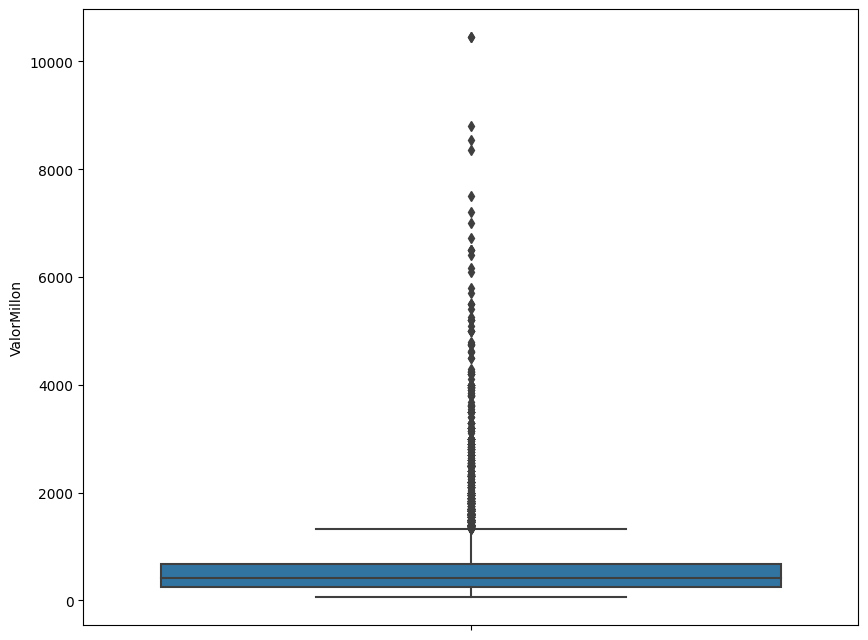

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=inmuebles, y = 'ValorMillon')
plt.show()

In [ ]:
inmuebles=inmuebles.loc[inmuebles['ValorMillon']<4000]

In [ ]:
inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Valor', 'ValorMillon'],
      dtype='object')

In [ ]:
inmuebles=inmuebles[['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ', 'ValorMillon']]

In [ ]:
inmuebles

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,ValorMillon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970.00
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,670.00
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,900.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,335.00


In [ ]:
ProfileReport(inmuebles)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
inmuebles.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [ ]:
inmuebles=inmuebles.loc[(inmuebles['Tipo']=='Apartamento') | (inmuebles['Tipo']=='Casa')]

In [ ]:
inmuebles=pd.get_dummies(inmuebles, columns = ["Tipo"])

In [ ]:
inmuebles.columns

Index(['Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'ValorMillon', 'Tipo_Apartamento', 'Tipo_Casa'],
      dtype='object')

In [ ]:
inmuebles=inmuebles[['Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'ValorMillon', 'Tipo_Apartamento']]

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 0 to 5872
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Descripcion       5780 non-null   object 
 1   Habitaciones      5780 non-null   int64  
 2   Banos             5780 non-null   int64  
 3   Area              5780 non-null   int64  
 4   Barrio            5780 non-null   object 
 5   UPZ               5753 non-null   object 
 6   ValorMillon       5780 non-null   float64
 7   Tipo_Apartamento  5780 non-null   uint8  
dtypes: float64(1), int64(3), object(3), uint8(1)
memory usage: 366.9+ KB


In [ ]:
inmuebles.corr()

,Habitaciones,Banos,Area,ValorMillon,Tipo_Apartamento
Habitaciones,1.000000,0.590936,0.607242,0.277438,-0.539601
Banos,0.590936,1.000000,0.752384,0.657407,-0.404062
Area,0.607242,0.752384,1.000000,0.752931,-0.530796
ValorMillon,0.277438,0.657407,0.752931,1.000000,-0.219259
Tipo_Apartamento,-0.539601,-0.404062,-0.530796,-0.219259,1.000000


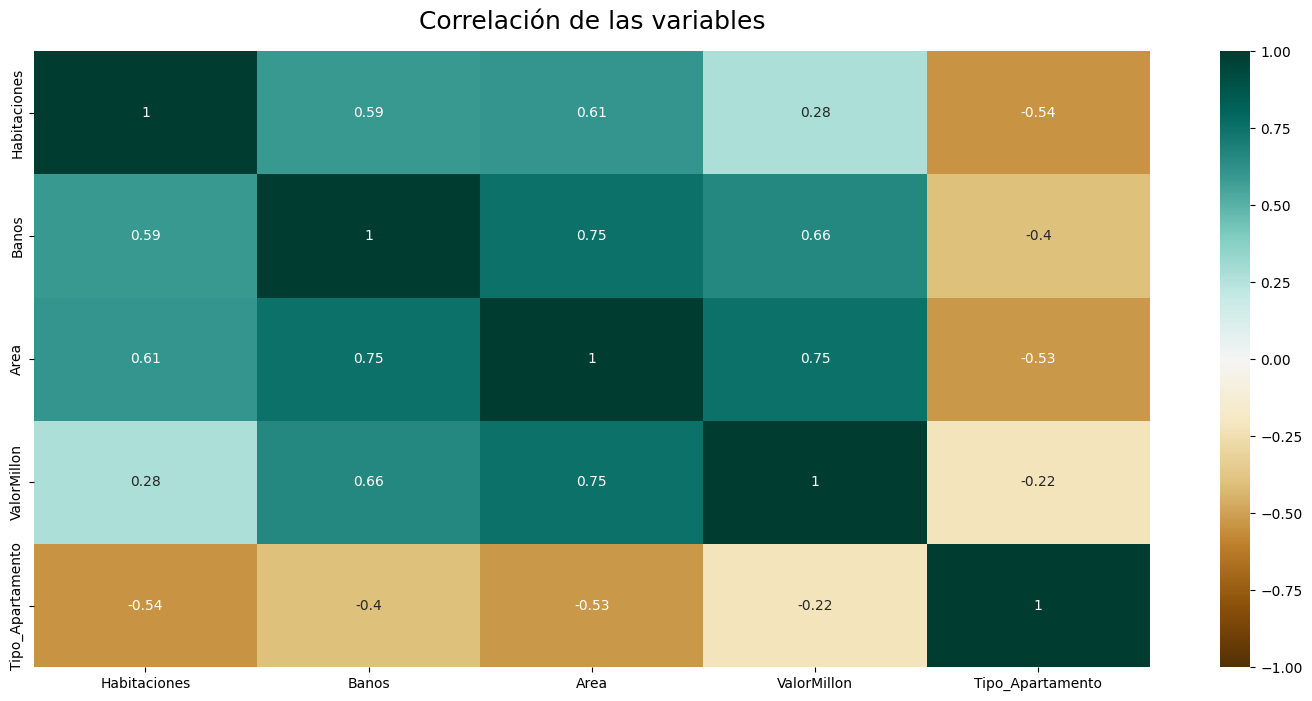

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(inmuebles.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

Trayendo codificación de las UPZ desde base de datos DANE

In [ ]:
upz_cod=datos_dane[['COD_UPZ_GRUPO','NOMBRE_UPZ_GRUPO']].drop_duplicates().reset_index(drop=True)

In [ ]:
lista_upz_cod="<option value="+upz_cod['COD_UPZ_GRUPO'].astype(str)+">"+upz_cod['NOMBRE_UPZ_GRUPO']+"</option>"

In [ ]:
lista_upz_cod=pd.DataFrame(lista_upz_cod)

In [ ]:
lista_upz_cod

,0
0,<option value=814.0>SANTA FE: Las Nieves + Sag...
1,<option value=37.0>Santa Isabel</option>
2,<option value=803.0>USAQUÉN: Country Club + Sa...
3,<option value=816.0>CHAPINERO: Pardo Rubio + C...
4,<option value=110.0>Ciudad Salitre Occidental<...
...,...
91,<option value=9.0>Verbenal</option>
92,<option value=23.0>Casa Blanca Suba</option>
93,<option value=19.0>El Prado</option>
94,<option value=41.0>Muzú</option>


In [ ]:
upz_cod="'"+upz_cod['NOMBRE_UPZ_GRUPO']+"'"+':'+"'"+upz_cod['COD_UPZ_GRUPO'].astype(str)+"'"

In [ ]:
pd.DataFrame(upz_cod)

,0
0,'SANTA FE: Las Nieves + Sagrado Corazón':'814.0'
1,'Santa Isabel':'37.0'
2,'USAQUÉN: Country Club + Santa Bárbara':'803.0'
3,'CHAPINERO: Pardo Rubio + Chapinero':'816.0'
4,'Ciudad Salitre Occidental':'110.0'
...,...
91,'Verbenal':'9.0'
92,'Casa Blanca Suba':'23.0'
93,'El Prado':'19.0'
94,'Muzú':'41.0'


In [ ]:
dict_upz={'SANTA FE: Las Nieves + Sagrado Corazón':'814.0'
,'Santa Isabel':'37.0'
,'USAQUÉN: Country Club + Santa Bárbara':'803.0'
,'CHAPINERO: Pardo Rubio + Chapinero':'816.0'
,'Ciudad Salitre Occidental':'110.0'
,'Los Cedros':'13.0'
,'USAQUÉN: Paseo de Los Libertadores + La Uribe':'804.0'
,'Usaquén':'14.0'
,'CHAPINERO: Chicó Lago + El Refugio':'817.0'
,'Teusaquillo':'101.0'
,'TEUSAQUILLO: Parque Simón Bolívar - CAN + La Esmeralda':'808.0'
,'La Candelaria':'94.0'
,'Galerías':'100.0'
,'Ciudad Salitre Oriental':'109.0'
,'Las Ferias':'26.0'
,'La Sabana':'102.0'
,'La Macarena':'92.0'
,'FONTIBÓN: Aeropuerto El Dorado + Capellanía':'813.0'
,'Fontibón San Pablo':'76.0'
,'KENNEDY: Castilla + Bavaria':'802.0'
,'Las Margaritas':'83.0'
,'Los Alcázares':'98.0'
,'Los Andes':'21.0'
,'BARRIOS UNIDOS: Parque Salitre + Doce de Octubre':'807.0'
,'Tintál Norte':'78.0'
,'Américas':'44.0'
,'La Alhambra':'20.0'
,'Niza':'24.0'
,'Tibabuyes':'71.0'
,'Toberín':'12.0'
,'Arborizadora':'65.0'
,'San Cristóbal Norte':'11.0'
,'20 de Julio':'34.0'
,'Ciudad Jardín':'35.0'
,'Marco Fidel Suárez':'53.0'
,'Tunjuelito':'62.0'
,'Las Cruces':'95.0'
,'Gran Yomasa':'57.0'
,'Fontibón':'75.0'
,'Granjas de Techo':'112.0'
,'Boyacá Real':'30.0'
,'Garcés Navas':'73.0'
,'ENGATIVÁ: Santa Cecilia + Jardín  Botánico':'810.0'
,'Engativá':'74.0'
,'San Isidro - Patios':'89.0'
,'Venecia':'42.0'
,'SUBA: La Academia + Guaymaral + San José de Bavaria':'806.0'
,'El Rincón':'28.0'
,'Patio Bonito':'82.0'
,'San Blas':'32.0'
,'Quiroga':'39.0'
,'Los Libertadores':'51.0'
,'Calandaima':'79.0'
,'USME: Alfonso López + Ciudad Usme':'811.0'
,'Kennedy Central':'47.0'
,'Jerusalén':'70.0'
,'Ciudad Montes':'40.0'
,'Marruecos':'54.0'
,'San José':'36.0'
,'San Rafael':'43.0'
,'Ismael Perdomo':'69.0'
,'La Flora':'52.0'
,'Zona Franca':'77.0'
,'Gran Britalia':'81.0'
,'Diana Turbay':'55.0'
,'Carvajal':'45.0'
,'El Porvenir':'86.0'
,'San Francisco':'66.0'
,'Suba':'27.0'
,'Bolivia':'72.0'
,'Sosiego':'33.0'
,'Bosa Occidental':'84.0'
,'Timiza':'48.0'
,'Britalia':'18.0'
,'Lourdes':'96.0'
,'Restrepo':'38.0'
,'Bosa Central':'85.0'
,'Lucero':'67.0'
,'Tintál Sur':'87.0'
,'Minuto de Dios':'29.0'
,'PUENTE ARANDA: Zona Industrial + Puente Aranda':'809.0'
,'La Gloria':'50.0'
,'La Floresta':'25.0'
,'Quinta Paredes':'107.0'
,'Corabastos':'80.0'
,'Apogeo':'49.0'
,'Modelia':'114.0'
,'Álamos':'116.0'
,'Comuneros':'58.0'
,'CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El Mochuelo':'815.0'
,'Verbenal':'9.0'
,'Casa Blanca Suba':'23.0'
,'El Prado':'19.0'
,'Muzú':'41.0'
,'USME: Parque Entrenubes + Danubio':'812.0'
,'Localidad Chapinero resto':'99'}

Creamos una nueva columna para el código de la UPZ y le asignamos como valor los nombres de la UPZ para luego reemplazarlos por los códigos del diccionario de UPZ generado.

In [ ]:
inmuebles['UPZ_COD']=inmuebles['UPZ']

In [ ]:
inmuebles.replace({'UPZ_COD': dict_upz},inplace=True)

Identificamos errores que habia en los nombres de las UPZ y se corrigieron teniendo en cuenta los datos recopilados en los siguientes directorios:
https://repositoriocdim.esap.edu.co/bitstream/handle/123456789/25094/listado_de_barrios_46.pdf?sequence=1&isAllowed=y

http://www.kennedy.gov.co/content/localidad-upz

In [ ]:
inmuebles.replace({'UPZ': {'Localidad Usme resto':'Gran Yomasa'}},inplace=True)

In [ ]:
inmuebles.replace({'UPZ': {'Tintala':'Calandaima'}},inplace=True)

Detectamos que existen algunos NaN en las columnas de UPZ, por lo tanto analizamos estos registros y teniendo cuenta el nombre del barrio identificamos la UPZ a la que pertenecia y rellenamos estos datos faltantes.

In [ ]:
inmuebles.loc[inmuebles['UPZ'].isna()]

,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,ValorMillon,Tipo_Apartamento,UPZ_COD
577,Apartamento en venta en Pasadena,3,2,103,Pasadena,NaN,478.0,1,NaN
1205,Apartamento en venta en Pasadena,3,2,109,Pasadena,NaN,472.0,1,NaN
1252,Apartamento en venta en Pasadena,3,2,80,Pasadena,NaN,480.0,1,NaN
1413,Apartamento en venta en Pasadena,2,3,109,Pasadena,NaN,699.0,1,NaN
1670,Casa en venta en Pasadena,3,3,161,Pasadena,NaN,950.0,0,NaN
1907,Casa en venta en Pasadena,4,4,250,Pasadena,NaN,1500.0,0,NaN
1908,Apartamento en venta en Pasadena,1,2,49,Pasadena,NaN,340.0,1,NaN
1988,Apartamento en venta en Pasadena,2,2,64,Pasadena,NaN,320.0,1,NaN
2051,Apartamento en venta en Pasadena,2,2,71,Pasadena,NaN,360.0,1,NaN
2091,Apartamento en venta en Pasadena,3,3,115,Pasadena,NaN,580.0,1,NaN


In [ ]:
inmuebles['UPZ'].fillna('La Alhambra',inplace=True)

In [ ]:
inmuebles=inmuebles[['Tipo_Apartamento','Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio','UPZ_COD','UPZ',
       'ValorMillon']]

In [ ]:
inmuebles['UPZ_COD']=inmuebles['UPZ']

In [ ]:
inmuebles.replace({'UPZ_COD': dict_upz},inplace=True)

In [ ]:
inmuebles['UPZ_COD']=inmuebles['UPZ_COD'].astype(float)

In [ ]:
inmuebles.loc[inmuebles['UPZ'].isna()]

,Tipo_Apartamento,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ_COD,UPZ,ValorMillon


In [ ]:
inmuebles.describe()

,Tipo_Apartamento,Habitaciones,Banos,Area,UPZ_COD,ValorMillon
count,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000
mean,0.764879,3.086851,2.508651,121.586505,305.734948,596.572647
std,0.424111,1.680090,1.231653,98.506588,365.439646,529.283863
min,0.000000,1.000000,0.000000,16.000000,9.000000,79.000000
25%,1.000000,2.000000,2.000000,59.000000,21.000000,270.000000
50%,1.000000,3.000000,2.000000,85.000000,74.000000,436.500000
75%,1.000000,3.000000,3.000000,145.000000,806.000000,720.000000
max,1.000000,20.000000,9.000000,920.000000,817.000000,3961.962000


In [ ]:
inmuebles=inmuebles[inmuebles['ValorMillon']<7000]

In [ ]:
inmuebles[inmuebles['ValorMillon']>6000]

,Tipo_Apartamento,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ_COD,UPZ,ValorMillon


#Entrenamiento ML model_1

Se entrena el modelo con los datos obtenidos del primer procesamiento

In [ ]:
X=inmuebles[['Habitaciones', 'Banos', 'Area','UPZ_COD', 'Tipo_Apartamento']]

In [ ]:
y=inmuebles['ValorMillon']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=199,shuffle=True)

In [ ]:
X_train

,Habitaciones,Banos,Area,UPZ_COD,Tipo_Apartamento
3481,8,6,354,26.0,0
882,2,2,70,19.0,1
234,3,3,131,14.0,0
1029,3,2,97,101.0,1
3126,3,4,278,816.0,0
...,...,...,...,...,...
325,3,2,50,809.0,1
1921,3,3,76,25.0,1
3423,3,2,103,14.0,1
2464,2,3,92,817.0,1


In [ ]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=model_1.predict(X_test)

In [ ]:
print('MAE',mean_absolute_error(y_test,prediction))
print('Accuracy r2',r2_score(y_test,prediction))

MAE 171.62906194919577
Accuracy r2 0.6783697077228401


Text(0.5, 0, 'Y test')

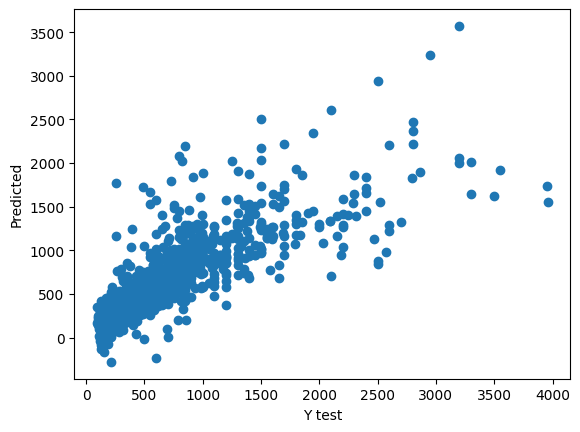

In [ ]:
plt.scatter(y_test, prediction)
plt.ylabel('Predicted')
plt.xlabel('Y test')

#Entrenamiento ML model_2

In [ ]:
osdf=inmuebles

In [ ]:
count_class_1, count_class_0 = osdf.Tipo_Apartamento.value_counts()

In [ ]:
count_class_1,count_class_0

(4421, 1359)

In [ ]:
osdf_class1=osdf[osdf.Tipo_Apartamento==1]
osdf_class0=osdf[osdf.Tipo_Apartamento==0]

In [ ]:
osdf_class_0_over = osdf_class0.sample(count_class_1, replace=True)
osdf_resample = pd.concat([osdf_class1, osdf_class_0_over], axis=0)

In [ ]:
osdf_resample

,Tipo_Apartamento,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ_COD,UPZ,ValorMillon
0,1,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,816.0,CHAPINERO: Pardo Rubio + Chapinero,360.0
2,1,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,817.0,CHAPINERO: Chicó Lago + El Refugio,1120.0
3,1,Apartamento en venta en Usaquén,3,2,154,Usaquén,14.0,Usaquén,890.0
4,1,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,803.0,USAQUÉN: Country Club + Santa Bárbara,970.0
5,1,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,803.0,USAQUÉN: Country Club + Santa Bárbara,510.0
...,...,...,...,...,...,...,...,...,...
2139,0,Casa en venta en Ciudad Salitre,4,5,316,Ciudad Salitre,109.0,Ciudad Salitre Oriental,2400.0
1169,0,Casa en venta en Usaquén,3,2,140,Usaquén,14.0,Usaquén,534.0
185,0,Casa en venta en Kennedy,14,7,360,Kennedy,47.0,Kennedy Central,1290.0
3180,0,Casa en venta en Fontibón,3,2,56,Fontibón,75.0,Fontibón,240.0


In [ ]:
X_os=osdf_resample[['Habitaciones', 'Banos', 'Area','UPZ_COD', 'Tipo_Apartamento']]
y_os=osdf_resample['ValorMillon']

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.25,random_state=199,shuffle=True)

In [ ]:
model_2=LinearRegression()
model_2.fit(X_train_os,y_train_os)

LinearRegression()

In [ ]:
prediction1=model_2.predict(X_test_os)

In [ ]:
print('MAE',mean_absolute_error(y_test_os,prediction1))
print('Accuracy r2',r2_score(y_test_os,prediction1))

MAE 203.65883148092695
Accuracy r2 0.6355865205136206


Text(0.5, 0, 'Y test')

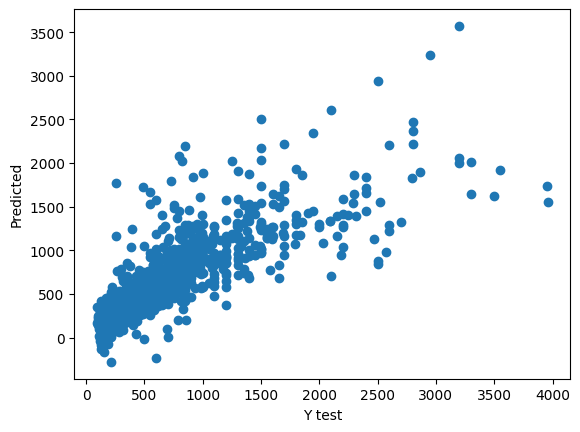

In [ ]:
plt.scatter(y_test, prediction)
plt.ylabel('Predicted')
plt.xlabel('Y test')

#Entrenamiento ML model_3

Aplicando Random Oversampling para balancear las variables

In [ ]:
p=inmuebles

In [ ]:
pX=p[['Habitaciones', 'Banos', 'Area','UPZ_COD', 'Tipo_Apartamento']]

In [ ]:
py=p['ValorMillon'].astype(int)

In [ ]:
os=RandomOverSampler()

In [ ]:
pos_X,pos_y=os.fit_resample(pX,py)

In [ ]:
pos_X

,Habitaciones,Banos,Area,UPZ_COD,Tipo_Apartamento
0,3,2,70,816.0,1
1,4,3,170,802.0,0
2,3,3,144,817.0,1
3,3,2,154,14.0,1
4,2,3,128,803.0,1
...,...,...,...,...,...
65143,3,5,248,817.0,1
65144,3,5,248,817.0,1
65145,3,5,248,817.0,1
65146,3,5,248,817.0,1


In [ ]:
Xpos_train,Xpos_test,ypos_train,ypos_test=train_test_split(pos_X,pos_y)

In [ ]:
model_3=LinearRegression()

In [ ]:
model_3.fit(Xpos_train,ypos_train)

LinearRegression()

In [ ]:
prediction_p=model_3.predict(Xpos_test)

In [ ]:
print('MAE',mean_absolute_error(ypos_test,prediction_p))
print('Accuracy r2',r2_score(ypos_test,prediction_p))

MAE 227.46045701669058
Accuracy r2 0.7253006007220023


Text(0.5, 0, 'Y test')

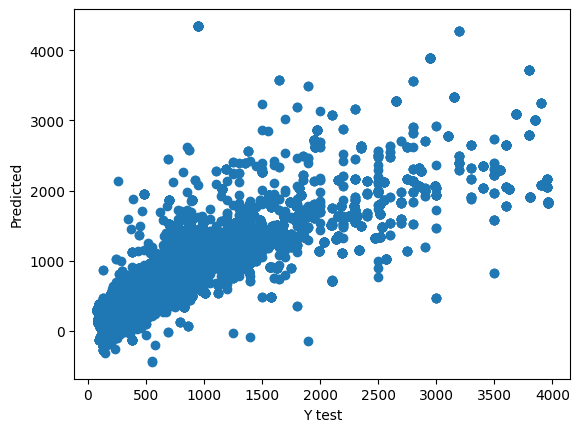

In [ ]:
plt.scatter(ypos_test,prediction_p)
plt.ylabel('Predicted')
plt.xlabel('Y test')

#Entrenamiento ML model_4

Normalizando columna Area

In [ ]:
df_nor=osdf_resample

<Axes: xlabel='Area', ylabel='Count'>

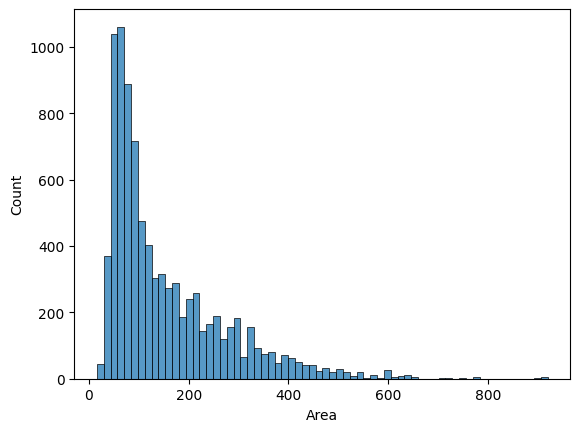

In [ ]:
sns.histplot(df_nor['Area'])

In [ ]:
scaler = MinMaxScaler()
df_nor['Area']=scaler.fit_transform(df_nor[['Area']])

<Axes: xlabel='Area', ylabel='Count'>

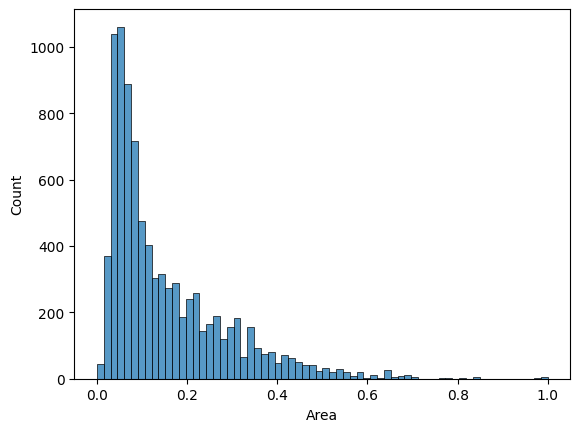

In [ ]:
sns.histplot(df_nor['Area'])

In [ ]:
Xnor=df_nor[['Habitaciones', 'Banos', 'Area','UPZ_COD', 'Tipo_Apartamento']]
ynor=df_nor['ValorMillon']

In [ ]:
Xnor_train,Xnor_test,ynor_train,ynor_test=train_test_split(Xnor,ynor)

In [ ]:
model_4=LinearRegression()

In [ ]:
model_4.fit(Xnor_train,ynor_train)

LinearRegression()

In [ ]:
prediction_nor=model_4.predict(Xnor_test)

In [ ]:
print('MAE',mean_absolute_error(ynor_test,prediction_nor))
print('Accuracy r2',r2_score(ynor_test,prediction_nor))

MAE 207.43650922891067
Accuracy r2 0.6521936364453575


Text(0.5, 0, 'Y test')

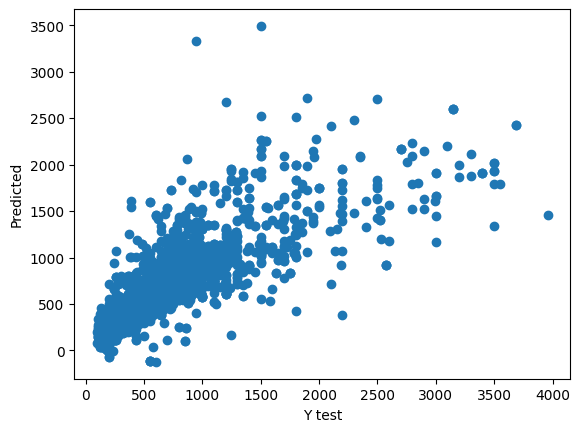

In [ ]:
plt.scatter(ynor_test,prediction_nor)
plt.ylabel('Predicted')
plt.xlabel('Y test')

#Entrenamiento ML model_5

A los datos tratados con RandomOverSampling, le aplicamos un modelo de regresión polinomial.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(pos_X)
train_x_poly

array([[1.00000e+00, 3.00000e+00, 2.00000e+00, ..., 6.65856e+05,
        8.16000e+02, 1.00000e+00],
       [1.00000e+00, 4.00000e+00, 3.00000e+00, ..., 6.43204e+05,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 3.00000e+00, 3.00000e+00, ..., 6.67489e+05,
        8.17000e+02, 1.00000e+00],
       ...,
       [1.00000e+00, 3.00000e+00, 5.00000e+00, ..., 6.67489e+05,
        8.17000e+02, 1.00000e+00],
       [1.00000e+00, 3.00000e+00, 5.00000e+00, ..., 6.67489e+05,
        8.17000e+02, 1.00000e+00],
       [1.00000e+00, 3.00000e+00, 5.00000e+00, ..., 6.67489e+05,
        8.17000e+02, 1.00000e+00]])

In [ ]:
Xpoly_train,Xpoly_test,ypoly_train,ypoly_test=train_test_split(train_x_poly,pos_y)

In [ ]:
model_5=LinearRegression()

In [ ]:
model_5.fit(Xpoly_train,ypoly_train)

LinearRegression()

In [ ]:
prediction_poly=model_5.predict(Xpoly_test)

In [ ]:
print('MAE',mean_absolute_error(ypoly_test,prediction_poly))
print('Accuracy r2',r2_score(ypoly_test,prediction_poly))
print('MSE',mean_squared_error(ypoly_test,prediction_poly,squared=True))
print('RMSE',mean_squared_error(ypoly_test,prediction_poly,squared=False))

MAE 192.08897526415336
Accuracy r2 0.7991174225567469
MSE 112735.0001357185
RMSE 335.76033139088736


Text(0.5, 0, 'Y test')

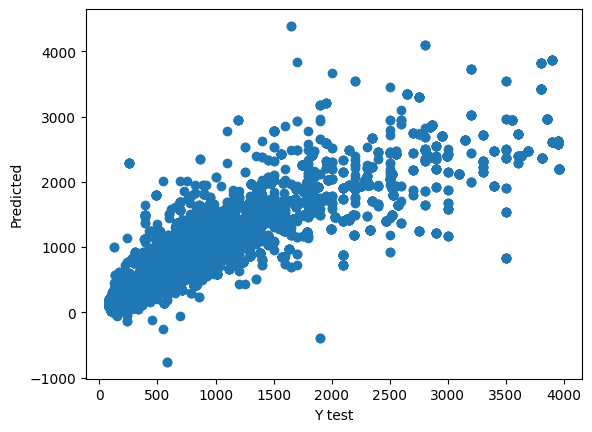

In [ ]:
plt.scatter(ypoly_test,prediction_poly)
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [ ]:
#prediccion=model_5.predict(XP)

In [ ]:
#DFP=inmuebles[['Habitaciones', 'Banos', 'Area','UPZ_COD', 'Tipo_Apartamento','ValorMillon']]

In [ ]:
#DFP=DFP[DFP['Tipo_Apartamento']==1]

In [ ]:
#XT=DFP[['Habitaciones', 'Banos', 'Area','UPZ_COD', 'Tipo_Apartamento']]

In [ ]:
#XP=poly.fit_transform(XT)

In [ ]:
#print('MAE',mean_absolute_error(DFP['ValorMillon'],prediccion))
#print('Accuracy r2',r2_score(DFP['ValorMillon'],prediccion))
#print('MSE',mean_squared_error(DFP['ValorMillon'],prediccion))
#print('RMSE',mean_squared_error(DFP['ValorMillon'],prediccion))

MAE 123.47074472564196
Accuracy r2 0.7831189817476526
MSE 48746.91167560746
RMSE 48746.91167560746


#Conclusiones:

Despues de varias pruebas con distintos modelos y luego de realizar varios tratamientos a los datos, logramos obtener un modelo que tiene una exactitud de un 80.7% y un error de al rededor de 100millones en el resultado, lo cual nos permite validar este modelo.
Sin embargo, se recomienda utilizar el modelo para predecir Inmuebles tipo apartamento, ya que la eficiencia de este, se reduce a un Accuracy de 50% cuando intentamos predecir inmuebles tipo Casas.

Exportamos el modelo:

In [ ]:
import joblib

In [ ]:
joblib.dump(model_5,'modelo_entrenado.pkl')